In [1]:
import zipfile
import os

with zipfile.ZipFile(os.path.join("data", "archive.zip")) as zp:
    zp.extractall(os.path.join("data"))


In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv(
    os.path.join("data", "bank-additional-full.csv"), sep=";", na_values="unknown"
)


In [3]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             40858 non-null  object 
 2   marital         41108 non-null  object 
 3   education       39457 non-null  object 
 4   default         32591 non-null  object 
 5   housing         40198 non-null  object 
 6   loan            40198 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

We have around 42k rows of data, around half of them being categorical one. There are some missing values marked as "unknown"

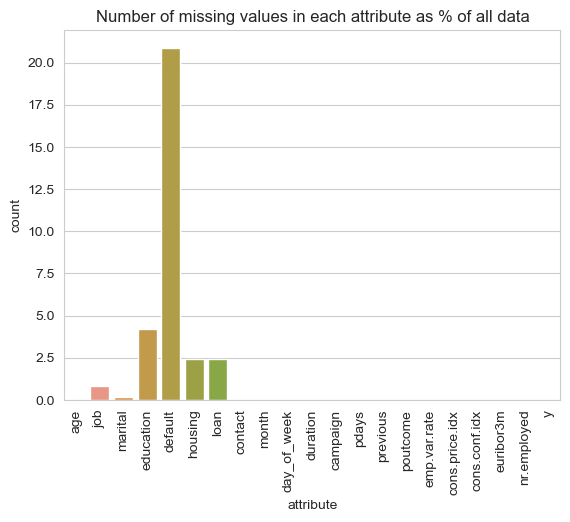

In [4]:
missing = df.isnull().mean() * 100
missing = pd.DataFrame(np.c_[missing, df.columns], columns=["count", "attribute"])

sns.set_style("whitegrid")
g = sns.barplot(missing, x="attribute", y="count")
g.tick_params("x", rotation=90)
plt.title("Number of missing values in each attribute as % of all data")
plt.show()

The most missing values is in "default" attribute, more than 20 % of its entries are missing. 
There are some smaller holes in "education", "housing", "job" and "loan" attributes as well

In [5]:
k = 8
columns = [f"r_{i + 1}" for i in range(k)] + ["dtype"]

pd.DataFrame(np.c_[df.head(k).T, df.dtypes], index=df.columns, columns=columns)


,r_1,r_2,r_3,r_4,r_5,r_6,r_7,r_8,dtype
age,56,57,37,40,56,45,59,41,int64
job,housemaid,services,services,admin.,services,services,admin.,blue-collar,object
marital,married,married,married,married,married,married,married,married,object
education,basic.4y,high.school,high.school,basic.6y,high.school,basic.9y,professional.course,NaN,object
default,no,NaN,no,no,no,NaN,no,NaN,object
housing,no,no,yes,no,no,no,no,no,object
loan,no,no,no,no,yes,no,no,no,object
contact,telephone,telephone,telephone,telephone,telephone,telephone,telephone,telephone,object
month,may,may,may,may,may,may,may,may,object
day_of_week,mon,mon,mon,mon,mon,mon,mon,mon,object


Based on upper frame we can tell that all numeric data (only in kth first rows) are loaded as numerical
data, so there are no obvious misssing values among them (such as # entry)

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,41188.0,40.024060,10.421250,17.000,32.000,38.000,47.000,98.000
duration,41188.0,258.285010,259.279249,0.000,102.000,180.000,319.000,4918.000
campaign,41188.0,2.567593,2.770014,1.000,1.000,2.000,3.000,56.000
pdays,41188.0,962.475454,186.910907,0.000,999.000,999.000,999.000,999.000
previous,41188.0,0.172963,0.494901,0.000,0.000,0.000,0.000,7.000
emp.var.rate,41188.0,0.081886,1.570960,-3.400,-1.800,1.100,1.400,1.400
cons.price.idx,41188.0,93.575664,0.578840,92.201,93.075,93.749,93.994,94.767
cons.conf.idx,41188.0,-40.502600,4.628198,-50.800,-42.700,-41.800,-36.400,-26.900
euribor3m,41188.0,3.621291,1.734447,0.634,1.344,4.857,4.961,5.045
nr.employed,41188.0,5167.035911,72.251528,4963.600,5099.100,5191.000,5228.100,5228.100


All the numerical data don't possess any missing entries, "pdays" consists mostly of 999, however it has very large
std. Most people are middle aged, but again age and call duration have relatively high std. Duration, nr.employed and
pdays can be vary large (3 or 4 digits) compared to ret of values. There are some negative entries.

In [7]:
df.describe(include="object").T


,count,unique,top,freq
job,40858,11,admin.,10422
marital,41108,3,married,24928
education,39457,7,university.degree,12168
default,32591,2,no,32588
housing,40198,2,yes,21576
loan,40198,2,no,33950
contact,41188,2,cellular,26144
month,41188,10,may,13769
day_of_week,41188,5,thu,8623
poutcome,41188,3,nonexistent,35563


Large % of object attributes are binary, nearly all of "default" entries are "no", 
most of "loan" and "y" entries are "no" as well. "Poutcome" is mostly set to "nonexistent". Many
people in the dataset are highly educated, most popular job is "admin"

In [8]:
df["job"].unique()


array(['housemaid', 'services', 'admin.', 'blue-collar', 'technician',
       'retired', 'management', 'unemployed', 'self-employed', nan,
       'entrepreneur', 'student'], dtype=object)

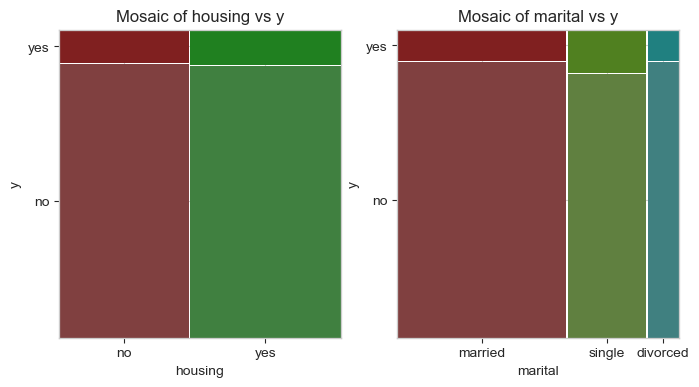

In [9]:
from statsmodels.graphics.mosaicplot import mosaic

fig, axes = plt.subplots(1, 2)
fig.set_size_inches(8, 4)
axes[0].set_xlabel("housing")
axes[0].set_ylabel("y")
mosaic(df, ["housing", "y"], labelizer=lambda k: '', ax=axes[0], title="Mosaic of housing vs y")
axes[1].set_xlabel("marital")
axes[1].set_ylabel("y")
mosaic(df, ["marital", "y"], labelizer=lambda k: '', ax=axes[1], title="Mosaic of marital vs y")

plt.show()


There are more people with houses as well as married people dominate. 
The highest percentage of loans are taken by singles.

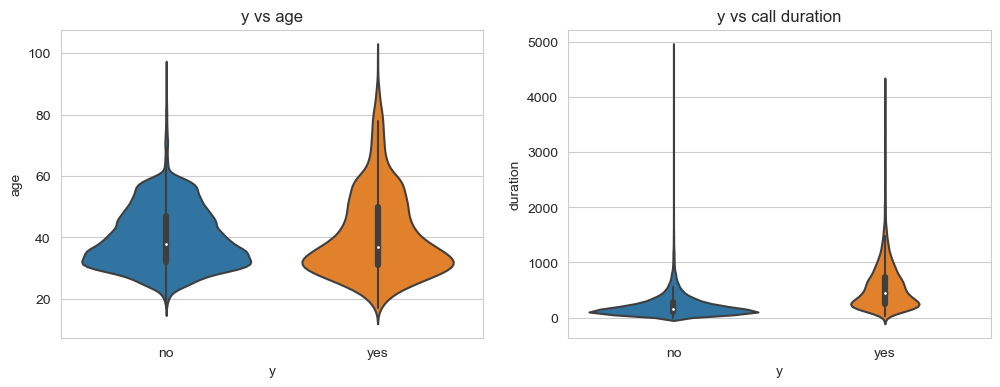

In [10]:
plt.figure(figsize=(12, 4))
plt.subplot(121)
sns.violinplot(data=df, y="age", x="y")
plt.title("y vs age")
plt.subplot(122)
sns.violinplot(data=df, y="duration", x="y")
plt.title("y vs call duration")

plt.show()


Majority of asked clients are around their 30s.
Shorter calls tends to loan refusal and they dominate.
People after their 60s ar more likely to accept the loan than to refuse it.
Youngest loan-takers aren't even mature.

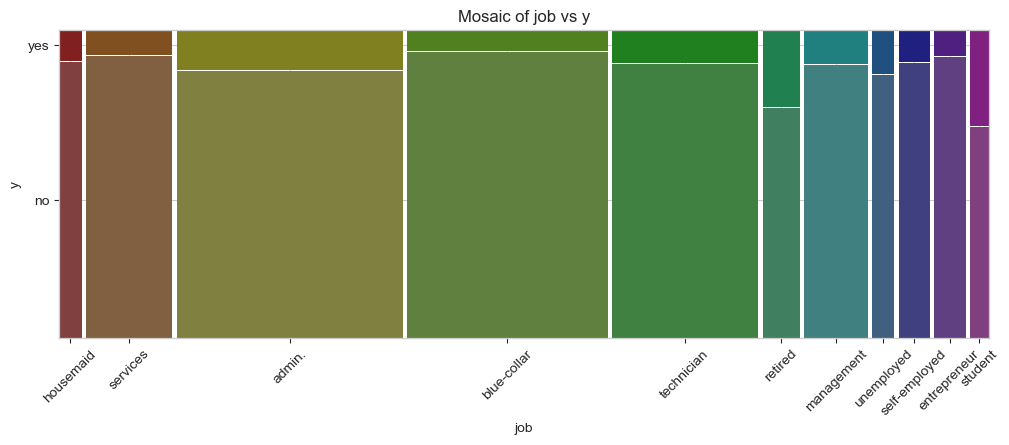

In [11]:
fig, ax = plt.subplots(1, 1)
fig.set_size_inches(12, 4)
ax.set_xlabel("job")
ax.set_ylabel("y")
mosaic(df, ["job", "y"], labelizer=lambda k: '', title="Mosaic of job vs y", ax=ax)
labels = ax.get_xticklabels()
ax.set_xticklabels(labels, rotation=45)
plt.show()


Retired people and students are more likely to take a loan to blue-collar workers, 
having probably the worst financial horizons

There are jobs that hardly ever take the loan. It's extremely popular among admins, and older retired people.
Short call duration only ends with loan refusal.

In [12]:
def plot_cols_histograms(col_names: list, **kwargs) -> None:
    fig, axes = plt.subplots(len(col_names), 1)
    fig.tight_layout()
    fig.set_size_inches(12, len(col_names) * 4)

    for i, col_name in enumerate(col_names):
        sns.histplot(df, x=col_name, hue="y", multiple="dodge", shrink=0.9, ax=axes[i])
        axes[i].set_title(f"Histogram of {col_name}")
        labels = axes[i].get_xticklabels()
        axes[i].set_xticklabels(labels, rotation=45)

    plt.show()


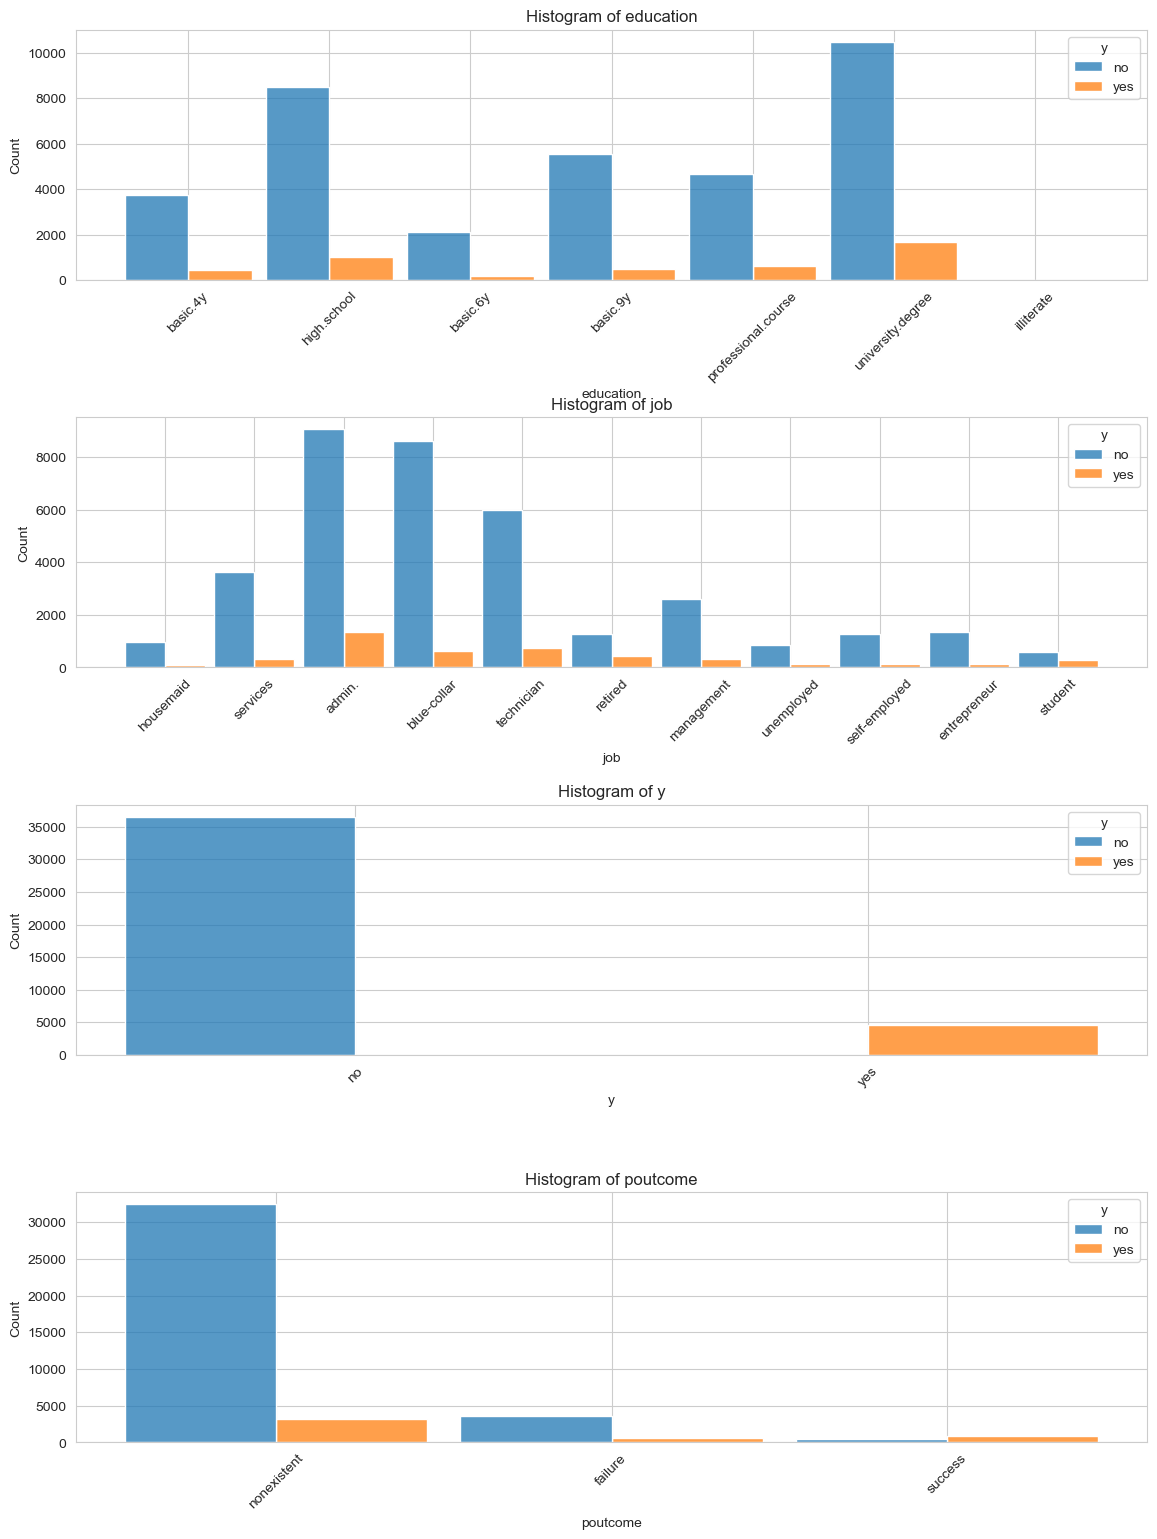

In [13]:
import warnings

warnings.filterwarnings("ignore")

plot_cols_histograms(["education", "job", "y", "poutcome"])


Mostly people with high school education or university degrees take up the loan.
If "poutcome" is "success", then "y" is "yes" in oppose to "failure". Most people refuse the loan, so baseline
for dummy model always predicting "y" = "no" will be around 80%. Jobs are distributed univenly

In [14]:
categorical = [col for col in df.columns if df[col].dtype == "object"]
numerical = [col for col in df.columns if col not in categorical]


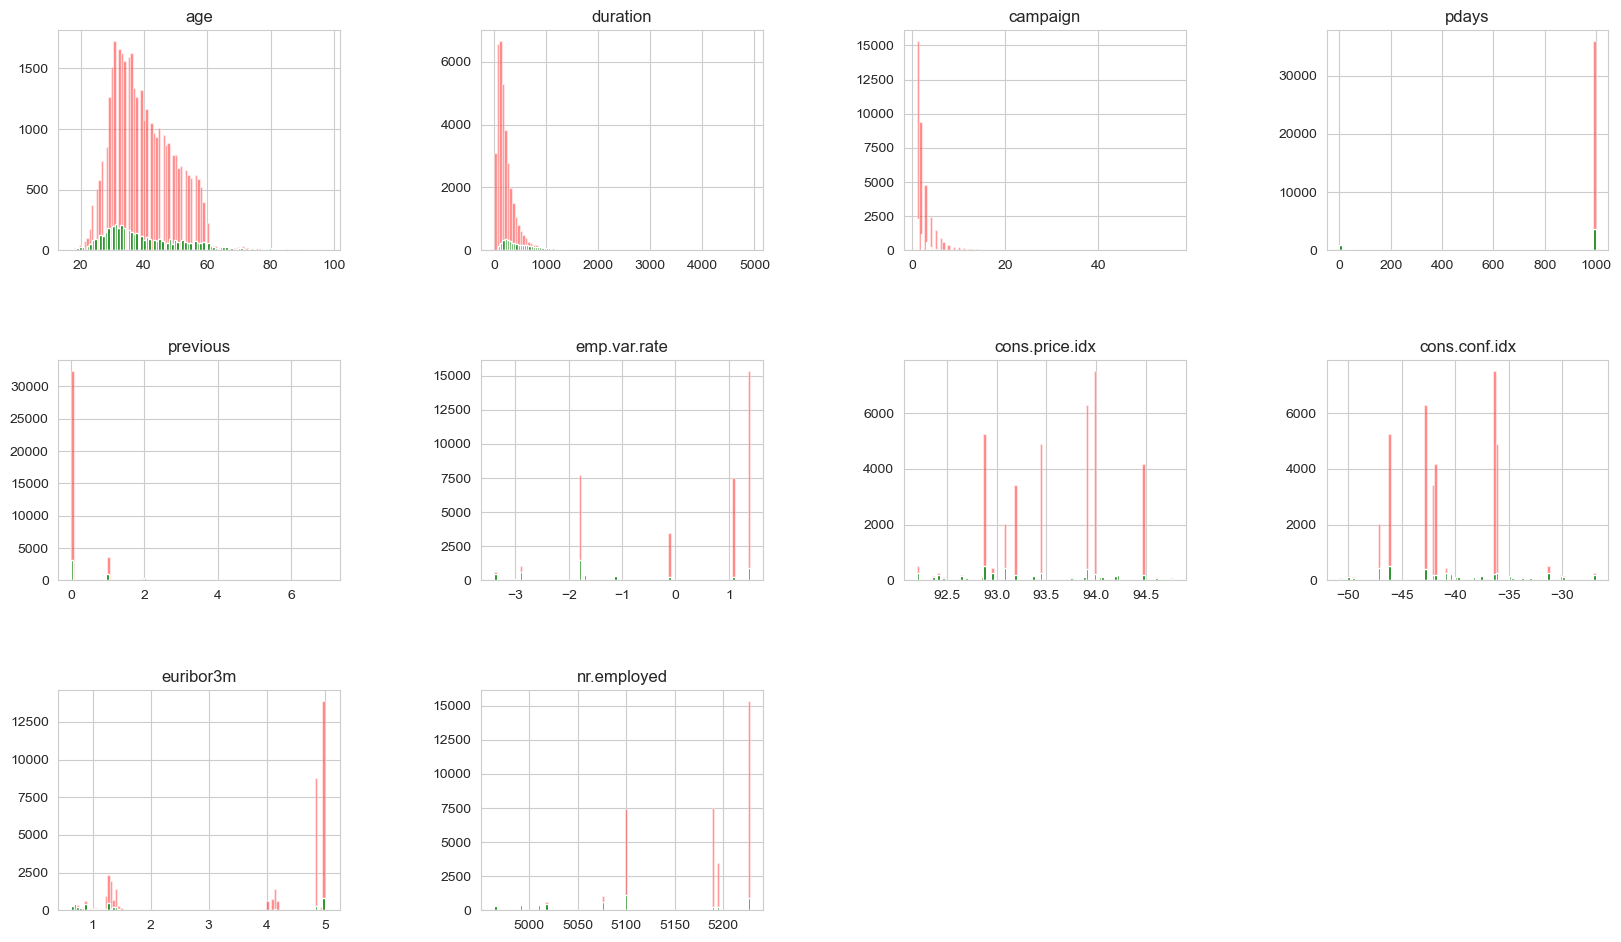

In [15]:
# smaller for all attributes
import math

plt.figure(figsize=(20, 20))
plt.subplots_adjust(hspace=0.5, wspace=0.5)

pos_idxs = np.where(df["y"] == "yes")[0]
neg_idxs = np.where(df["y"] == "no")[0]

for i, col in enumerate(numerical):
    plt.subplot(math.ceil(len(df.columns) // 4), 4, i + 1)

    plt.hist(df.loc[neg_idxs, col], color="r", bins=100, alpha=0.5)
    plt.hist(df.loc[pos_idxs, col], color="g", bins=100, alpha=1)

    plt.title(col)

os.makedirs("plots", exist_ok=True)
plt.savefig("plots/numerical_distributions.png")
plt.show()

Most of numerical attributes aren't evenly distributed

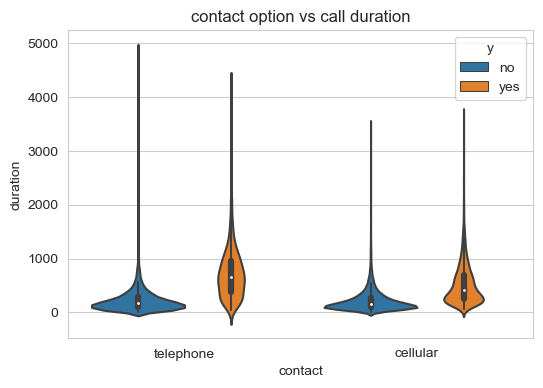

In [16]:
plt.figure(figsize=(6, 4))
sns.violinplot(data=df, x="contact", y="duration", hue="y")
plt.title("contact option vs call duration")
plt.show()


Longer call durations more often leaded to "y" = "yes"

In [17]:
from datetime import datetime as dt

dates = [dt(2022, month, day) for day in range(1, 8) for month in range(1, 13)]
dates = [date.strftime("%b-%a") for date in dates]

df["date"] = pd.Categorical(
    df["month"].str.title() + "-" + df["day_of_week"].str.title(), categories=dates
)
df.sort_values("date", inplace=True)


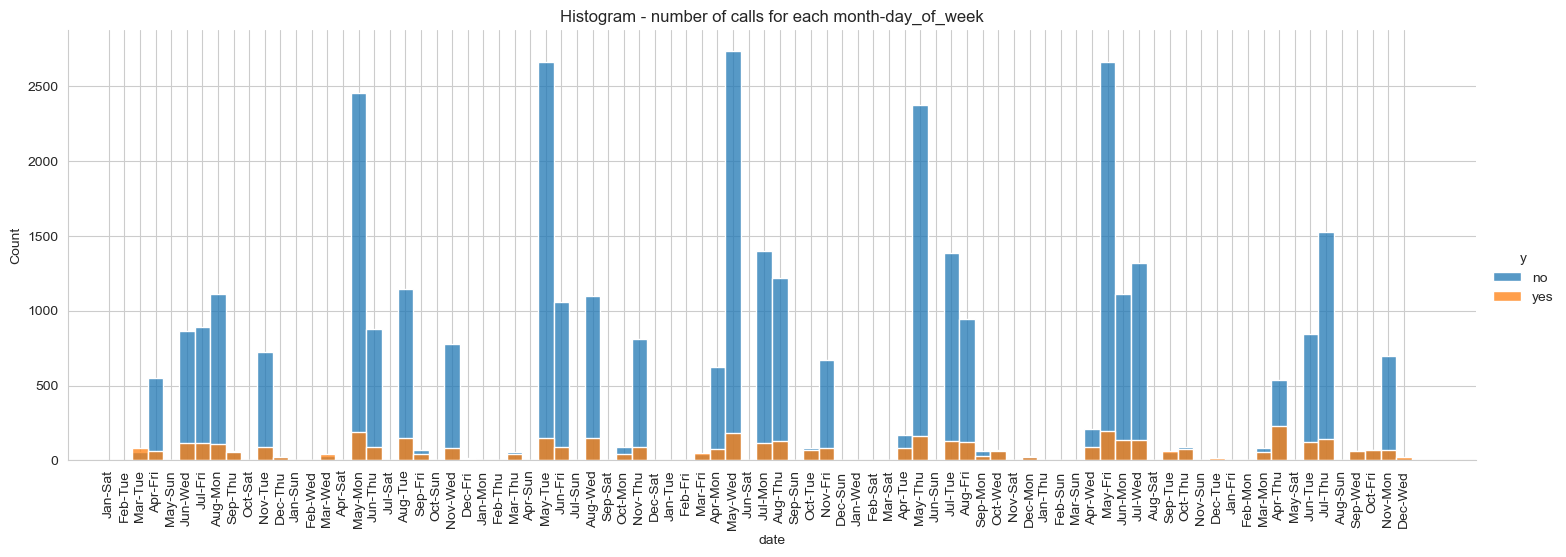

In [18]:
g = sns.FacetGrid(df, hue="y", aspect=3, height=5)
g.map_dataframe(sns.histplot, "date", bins=len(df["date"].unique())),
g.add_legend()
g.tick_params(axis="x", rotation=90)
plt.title(f"Histogram - number of calls for each month-day_of_week")
plt.show()


The less calls recorded at the given time period (ex mondays of April), the higher the
bank success rate was. It might be that on these days interested clients called the bank in
opose to days with large amounts of registered calls (on these days the bank advertised itself among
stragers)

In [19]:
def box_plot(data: pd.DataFrame, col_names: list, height=3, aspect=3, hspace=1, **kwargs) -> None:
    plt.figure(figsize=(aspect, height * len(col_names)))
    plt.subplots_adjust(hspace=hspace)

    for i, (x, y) in enumerate(col_names):
        plt.subplot(len(col_names), 1, i + 1)
        sns.boxplot(data=data, x=x, y=y, color="lightblue", **kwargs)
        plt.title(f"Distribution of {x} vs {y}")

    plt.show()


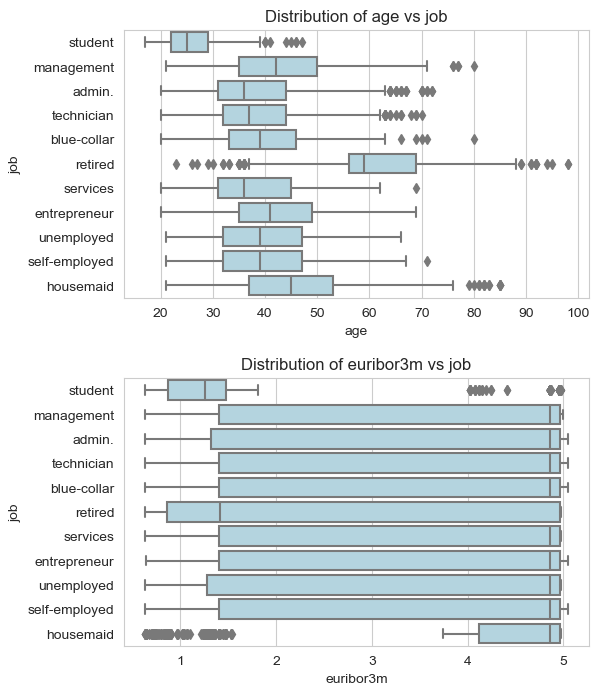

In [20]:
box_plot(df, [("age", "job"), ("euribor3m", "job")], height=4, aspect=6, hspace=0.3)

Both upper charts shows that there are some outliners. Many of them are in rows
with "job" = "student" or "housemaid". Retireing age seems to generate some outliners,
being dependent on the person's proffession etc

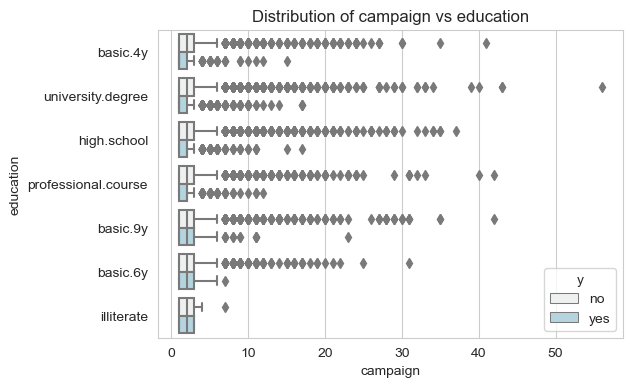

In [21]:
box_plot(df, [("campaign", "education")], height=4, aspect=6, hspace=0.3, hue="y")

y = "yes" on avereage comes with shorter campaign

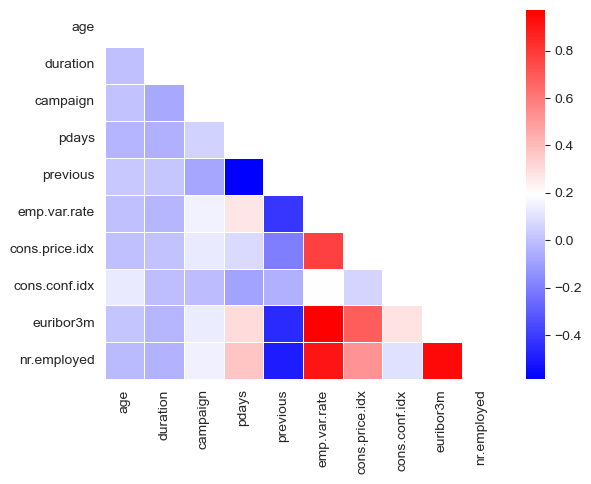

In [22]:
corr = df.corr(numeric_only=True)
mask = np.triu(np.ones_like(corr, dtype=bool))

sns.heatmap(corr, mask=mask, linewidths=0.5, cmap="bwr")
plt.show()


In [23]:
from sklearn.preprocessing import OrdinalEncoder

encoder = OrdinalEncoder()
df[categorical] = encoder.fit_transform(df[categorical])


In [24]:
df.drop("date", axis=1, inplace=True)


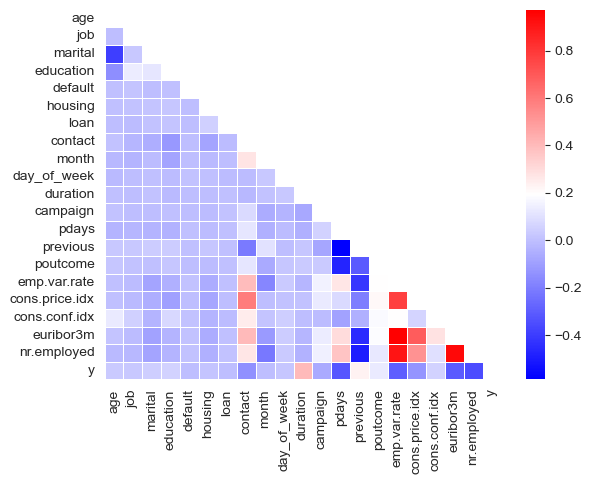

In [25]:
corr = df.corr(numeric_only=True)
mask = np.triu(np.ones_like(corr, dtype=bool))

sns.heatmap(corr, mask=mask, linewidths=0.5, cmap="bwr")
plt.show()


There are some strong correlations between some attributes, ex ("pdays", "previous"),
("marital", "age"), ("emp.var.rate", "cons.price.idx", "euribor3m", "nr.employed"). 
Call duration indded quite strong correlates with "y", as it is in dataset description.